In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from datenspende.utils import query_ch_df, query_pg_df
import datetime
from datetime import date
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
# get starting and end times of hourly bins
bin_s = []
bin_e = []
for h in range(24):
    for m in range(4):
    
        time_string_s = '%02d:%02d:%02d' % (h,m * 15,0)
        time_string_e = '%02d:%02d:%02d' % (h,(m * 15) + 14,59)
        bin_s.append(time_string_s)
        bin_e.append(time_string_e)

In [3]:
lc_u = np.load('uid_per_shb_fatigue.npy')

In [4]:
lc_u2=np.load('uid_per_shb_fatigue(1).npy')

In [5]:
import re

In [6]:
import os
import glob

path = os.getcwd()+'/user_df/'
csv_files = glob.glob(os.path.join(path, "*.csv"))

df_lcu = []
demo_info = []
uid = []
for f in csv_files:
      
    # read the csv file
    df = pd.read_csv(f, index_col = 0)
    for var in ['sleep', 'hr', 'steps']:
        if var not in df.columns:
            df[var] = np.nan
    df_lcu.append(df)
    demo_info.append(f.split("/")[-1].split('.')[0])
    uid.append(int(f.split("/")[-1].split('.')[1][1:])) 
      
sex = [re.split('(\d+)',demo_info[i])[0] for i in range(len(demo_info))]
age = [int(re.split('(\d+)',demo_info[i])[1]) for i in range(len(demo_info))] 


In [7]:
[u for u in range(len(uid)) if uid[u] not in lc_u2]

[31, 68]

In [8]:
df_lcu.pop(31)
uid.pop(31)
sex.pop(31)
age.pop(31)

70

In [9]:
df_lcu.pop(67)
uid.pop(67)
sex.pop(67)
age.pop(67)

60

In [ ]:


# was fuer qualitaetsmerkmalee - alle variablen muessen irgendwann notna sein 
# in allen phasen? 

# user in device gruppen aufteilen

# user nur an diff zu der eig max oder zum eigenen mean

In [10]:
for i in df_lcu:
    i['weekend'] = i['day_of_week'].apply(lambda x: True if x >= 5 else False)

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

i = 22
for ph in [0,1,2,3]:
    df = df_lcu[i]
    dfph = df[df['phase'] == ph]
    dfph_we = dfph[dfph['weekend'] == True]
    dfph_wd = dfph[dfph['weekend'] == False]
    ax[0].errorbar(dfph_we.groupby('time').mean().index, dfph_we.groupby('time').mean()['hr'], yerr=0)
    ax[1].errorbar(dfph_wd.groupby('time').mean().index, dfph_wd.groupby('time').mean()['hr'], yerr=0)
    ax[0].set_ylabel('heart rate weekend')
    ax[1].set_ylabel('heart rate week')
    ax[1].set_xlabel('time bins')
     
plt.legend(['pre', 'acute', 'sub-acute', 'post']);
plt.title('user: '+str(uid[i])+' '+sex[i]+' '+str(age[i]));

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(16,8))


for ph in [0,1,2,3]:
    df = df_lcu[i]
    dfph = df[df['phase'] == ph]
    ax.errorbar(dfph.groupby('time').mean().index, dfph.groupby('time').mean()['steps'] )
    #ax.set_title(u[i])
plt.legend(['pre', 'acute', 'sub-acute', 'post']);

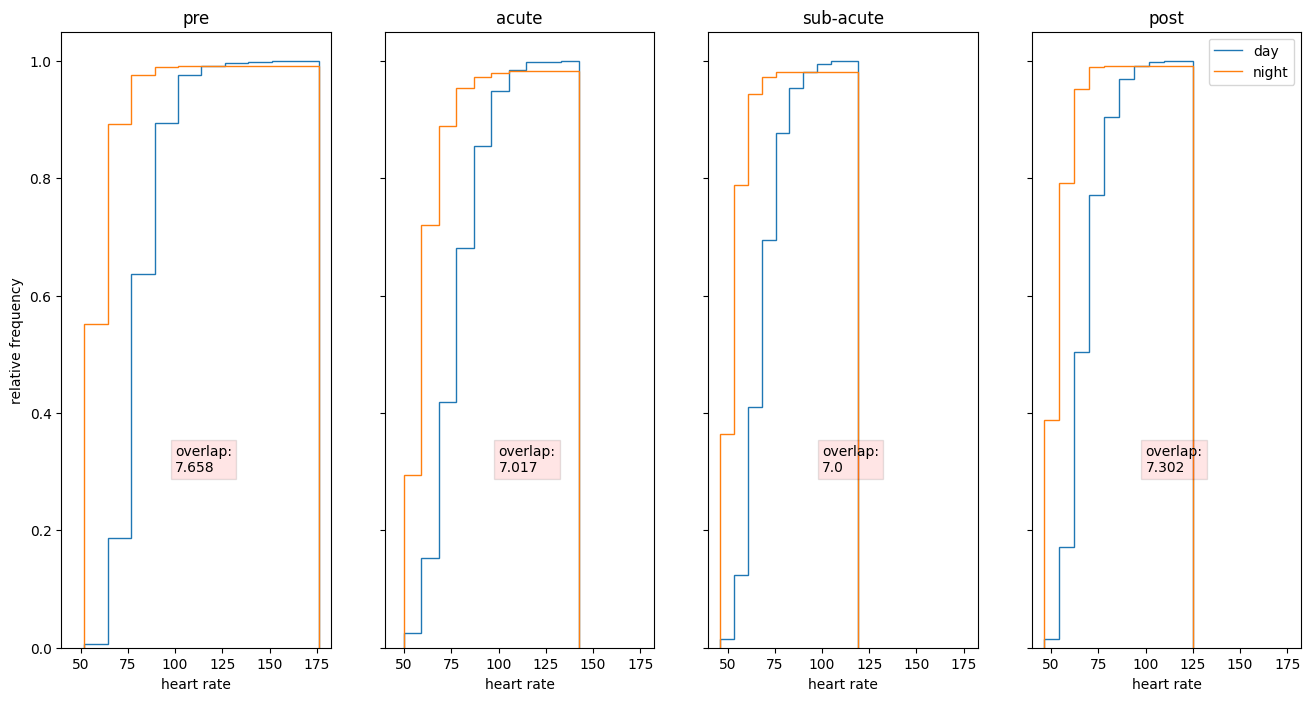

In [17]:
fig, ax = plt.subplots(1,4, figsize=(16,8), sharey=True, sharex = True)
phases = ['pre', 'acute', 'sub-acute', 'post']
for ph in [0,1,2,3]:
    df = df_lcu[22]
    dfph = df[df['phase'] == ph]
    #n,binn,_ = ax[ph].hist(dfph[dfph['sleep'] != 1]['hr'],density=True, histtype='step', orientation="horizontal")
    #ax[ph].hist(dfph[dfph['sleep'] == 1]['hr'],density=True, histtype='step',bins=binn, orientation="horizontal")
    
    #n_a,bins = np.histogram(dfph[dfph['sleep'] != 1]['hr'].dropna())
    #ax[ph].stairs(n_a/len(dfph[dfph['sleep'] != 1]['hr'].dropna()), bins, fill=False)
    #n_s = np.histogram(dfph[dfph['sleep'] == 1]['hr'].dropna(), bins = bins)[0]
    #ax[ph].stairs(n_s/len(dfph[dfph['sleep'] == 1]['hr'].dropna()), bins, fill=False)
    
    
    n_a,bins = np.histogram(dfph[(dfph['time'] >= 29)&(dfph['steps'].notna())]['hr'].dropna())
    ax[ph].stairs(n_a/len(dfph[(dfph['time'] >= 29)&(dfph['steps'].notna())]['hr'].dropna()), bins, fill=False)
    n_s = np.histogram(dfph[(dfph['time'] < 29)&(dfph['steps'].isna())]['hr'].dropna(), bins = bins)[0]
    ax[ph].stairs(n_s/len(dfph[(dfph['time'] < 29)&(dfph['steps'].isna())]['hr'].dropna()), bins, fill=False)
    A = n_a/len(dfph[(dfph['time'] >= 29)&(dfph['steps'].notna())]['hr'].dropna())
    B = n_s/len(dfph[(dfph['time'] < 29)&(dfph['steps'].isna())]['hr'].dropna())
    A = np.cumsum(n_a/len(dfph[(dfph['time'] >= 29)&(dfph['steps'].notna())]['hr'].dropna()))
    B = np.cumsum(n_s/len(dfph[(dfph['time'] < 29)&(dfph['steps'].isna())]['hr'].dropna())) 

    #ax[ph].bar(range(len(bins)),n/len(dfph[dfph['sleep'] != 1]['hr'].dropna()))
    #ax[ph].bar(range(len(bins)),np.histogram(dfph[dfph['sleep'] == 1]['hr'].dropna(), bins = bins)[0]/len(dfph[dfph['sleep'] == 1]['hr'].dropna()))
    ov = np.sum(np.minimum(A,B))
    ax[ph].text(100, 0.3, r'overlap:'+'\n'+str(np.round(ov,3)),
        bbox={'facecolor': 'red', 'alpha': 0.1, 'pad': 3})
    ax[ph].set_title(phases[ph])
    ax[ph].set_xlabel('heart rate');
ax[0].set_ylabel('relative frequency');
plt.legend(['day', 'night']);

In [ ]:
phases = ['pre', 'acute', 'sub-acute', 'post']
overlap = np.zeros((len(df_lcu), 4))
missing_us = []
missing_idx = []
for i in range(len(df_lcu)):
    df = df_lcu[i]     
    #if np.count_nonzero(df['sleep'].notna()):
    for ph in [0,1,2,3]:

        dfph = df[df['phase'] == ph] 
            #n_a,bins = np.histogram(dfph[dfph['sleep'] != 1]['hr'].dropna())
        n_a,bins = np.histogram(dfph[(dfph['time'] >= 29)&(dfph['steps'].notna())]['hr'].dropna())
            #A=n_a/len(dfph[dfph['sleep'] != 1]['hr'].dropna()) 
            #n_s = np.histogram(dfph[dfph['sleep'] == 1]['hr'].dropna(), bins = bins)[0]
        n_s = np.histogram(dfph[(dfph['time'] < 29)&(dfph['steps'].isna())]['hr'].dropna(), bins = bins)[0]
            #B=n_s/len(dfph[dfph['sleep'] == 1]['hr'].dropna()) 
        A = n_a/len(dfph[(dfph['time'] >= 29)&(dfph['steps'].notna())]['hr'].dropna())
        B = n_s/len(dfph[(dfph['time'] < 29)&(dfph['steps'].isna())]['hr'].dropna())
    
        overlap[i ,ph] = np.sum(np.minimum(A,B))
    #else:
    #    missing_us.append(uid[i])
    #    missing_idx.append(i)

In [ ]:
#mask = np.ones(overlap.shape, dtype=bool)
#mask[missing_idx,:] = False

In [ ]:
overlap#[np.any(mask,axis=1)]
overlap[overlap[:,-1] > overlap[:,0]]

## hr over time 

In [ ]:
hr_freq = np.zeros((96, len(df_lcu)))
hr_freq_agg = np.zeros((48, len(df_lcu)))
for i in range(len(df_lcu)):
    hr_freq[:,i] = df_lcu[i].groupby('time').mean().iloc[:,-1].values
    hr_freq_agg[:,i] =df_lcu[i].groupby('time').mean().groupby(np.arange(len(df_lcu[i].groupby('time').mean()))//2).mean().iloc[:,-1].values

In [ ]:
#binw = (int(np.ceil(np.nanmax(hr_freq))) - int(np.floor(np.nanmin(hr_freq)))) / 20
binn = range(int(np.floor(np.nanmin(hr_freq))), int(np.ceil(np.nanmax(hr_freq))))
binn_agg = range(int(np.floor(np.nanmin(hr_freq_agg))), int(np.ceil(np.nanmax(hr_freq_agg))))

In [ ]:
hr_users = np.zeros((len(binn)-1, 96))
for t in range(96):
    hr_users[:,t] = np.histogram(hr_freq[t,:], bins=binn)[0]

In [ ]:
hr_users_agg = np.zeros((len(binn_agg)-1, 48))
for t in range(48):
    hr_users_agg[:,t] = np.histogram(hr_freq_agg[t,:], bins=binn_agg)[0]

In [ ]:
plt.rcParams['font.size'] = 20

In [ ]:
plt.figure(figsize=(18,14))
im = plt.imshow(hr_users)
plt.xlabel('15 time bins')
plt.yticks(range(len(binn)-1)[::2],labels = list(binn)[:-1][::2])
plt.ylabel('% of max heart rate');
plt.colorbar(im,shrink=0.4, aspect=20*0.7);
plt.title('Histogram of % of max heart rate')

In [ ]:
plt.figure(figsize=(12,10))
im = plt.imshow(hr_users_agg)
plt.xlabel('30 time bins')
plt.yticks(range(len(binn_agg)-1),labels = list(binn_agg)[:-1])
plt.ylabel('% of max heart rate');
plt.colorbar(im,shrink=0.5, aspect=20*0.7);

## heart rate over steps


In [ ]:
    # group by day and hourly - sum up steps and take mean of heart rate
    # per day 24 time bins with steps summed up and mean of heart rate
    df_lcu_agg = []
    #for du in range(len(df_lcu[0])): 
    d = df_lcu[22].copy()
    d['steps'] = d['steps'].fillna(0)
    d['steps'] = d['steps'] + 1
    
    d_agg = pd.DataFrame(columns = ['hr', 'd to max hr [%]', 'date', 'time','weekend', 'week_totest', 'phase',
       'steps', 'hros'])
    
    for day in d['date'].unique():
        d_day = d[d['date'] ==day]
        d_day_agg_m = d_day[['time', 'hr', 'd to max hr [%]']].groupby('time').mean().groupby(np.arange(96)//4).mean()
        d_day_agg_s = d_day[['time', 'steps']].groupby('time').sum().groupby(np.arange(96)//4).sum()
        hr = d_day_agg_m.loc[:,'hr']
        steps = d_day_agg_s.loc[:,'steps']
        
        
        d_day_agg_m['date'] = day
        d_day_agg_m['time'] = d_day_agg_m.index
        d_day_agg_m['weekend'] = d_day['weekend'].iloc[0]
        d_day_agg_m['week_totest'] = d_day['week_totest'].iloc[0]
        d_day_agg_m['phase'] = d_day['phase'].iloc[0]
        d_day_agg_m['steps'] = steps
        d_day_agg_m['hros'] = hr/steps
        
        
        d_agg = d_agg.append(d_day_agg_m)
    d_agg = d_agg.reset_index()
    df_lcu_agg.append(d_agg)

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(16,8), sharey=True)
phases = ['pre', 'acute', 'sub-acute', 'post']
for ph in [0,1,2,3]:
    dfph = d_agg[d_agg['phase'] == ph]
    ax[ph].plot(range(len(dfph)), dfph['hros'])
    ax[ph].set_title(phases[ph])
    ax[ph].set_xlabel('time in 1 hour bins')
    ax[ph].set_ylabel('hros')

In [ ]:
plt.rcParams['font.size']=20

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(16,8), sharey=True)
phases = ['pre', 'acute', 'sub-acute', 'post']
for ph in [0,1,2,3]:
    dfph = d_agg[d_agg['phase'] == ph]
    dfph.groupby('index').mean()
    plt.plot(dfph.groupby('index').mean().index, dfph.groupby('index').mean()['hros'])
    
plt.xlabel('time in 1 hour bins')
plt.ylabel('hros')
plt.legend(phases);

## rhr (hr while sleep = 1) over time

In [ ]:
phases

In [ ]:
hrs = np.zeros((len(df_lcu), 4))
rhrs = np.zeros((len(df_lcu), 4))
for du in range(len(df_lcu)):
    for ph in range(4):
        dph = df_lcu[du][df_lcu[du]['phase'] == ph]
        rhrs[du,ph] = dph[(dph['time'] < 29) & (dph['steps'].isna())].mean()['d to max hr [%]']
        hrs[du,ph] = dph[(dph['time'] >= 29) & (dph['steps'].notna())].mean()['d to max hr [%]']
        

In [ ]:
# percentage of rhr is not equal for every person so can only compare person to itself in different phases 

In [ ]:
du = 17
mean_hr = np.zeros((4,96))
fig, ax = plt.subplots(1,4)
for ph in range(4):
    dph = df_lcu[du][df_lcu[du]['phase'] == ph]
    hr_pd = np.zeros((len(dph['date'].unique()), 96))
    i = 0
    for dt in dph['date'].unique():
        hr_pd[i,:] = dph[dph['date'] == dt]['d to max hr [%]'].values
        ax[ph].plot(range(96),dph[dph['date'] == dt]['d to max hr [%]'].values)
        i += 1
    mean_hr[ph,:] = np.nanmean(hr_pd, axis=0)

In [ ]:
df_lcu[du][df_lcu[du]['phase'] == 2][df_lcu[du][df_lcu[du]['phase'] == 2]['hr'].notna()]

In [ ]:
np.nanmean(hr_pd, axis=0)

In [ ]:
df_lcu[0][(df_lcu[0]['time'] < 29) & (df_lcu[0]['steps'].isna())].mean() 

In [ ]:
df_lcu[0][(df_lcu[0]['time'] > 29)  & (df_lcu[0]['steps'].notna())].mean()

In [ ]:
df_lcu[81][df_lcu[81]['sleep'] == 1].mean()

## steps

In [ ]:
mins = []
maxs = []
for du in df_lcu:
    mins.append(du['week_totest'].min())
    maxs.append(du['week_totest'].max())

In [ ]:
min(mins)

In [ ]:
max(maxs)

In [ ]:
steps_z = np.empty((len(df_lcu), len(range(-118,48))))

In [ ]:
steps_z = np.empty((len(df_lcu), len(range(-118,48))))
steps_z[:] = np.nan
for du in range(len(df_lcu)):
    mu = df_lcu[du][df_lcu[du]['week_totest'] < -1].groupby('week_totest').sum()['steps'].mean()
    sigma = df_lcu[du][df_lcu[du]['week_totest'] < -1].groupby('week_totest').sum()['steps'].std()
    z = (df_lcu[du].groupby('week_totest').sum()['steps'] - mu)/sigma
    steps_z[du, z.index + 118] = z.values

In [ ]:
steps_z[du, z.index + 118] 

In [ ]:
plt.figure(figsize=(10,15))
plt.imshow(steps_z[:,90:166])
plt.xticks(range(len(range(90,166))),  list(range(-28, 48 )), rotation = 90)
plt.colorbar()

In [ ]:
dfph_mean = np.zeros((len(df_lcu), 4))
for du in range(len(df_lcu)): 
    d = df_lcu[du].copy()
    d['steps'] = d['steps'].fillna(0)
    d['steps'] = d['steps'] + 1
    for ph in range(4):
        dfph = d[d['phase'] == ph]
        dfph_mean[du, ph] = dfph.groupby('date').sum()['steps'].mean()/d[d['phase'] == 0].groupby('date').sum()['steps'].mean()
    

In [ ]:
clean_nan = dfph_mean[~np.any(np.isnan(dfph_mean ),axis=1)]
clean_nan = clean_nan[~np.any(clean_nan > 5,axis=1)]
my_dict = {'pre': clean_nan[:,0], 'acute': clean_nan[:,1] , 'sub-acute':clean_nan[:,2] , 'post':clean_nan[:,3]}

fig, ax = plt.subplots(figsize=(15,10))
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys());
ax.plot(np.arange(1,6), [1]*5, color='r')
ax.set_ylabel(r"mean steps per day [phase]/" + "\n" + "mean steps per day [pre phase]");